In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [2]:
# 1. Chargement des données
df = pd.read_csv("../Data/raw/atus_full_selected.csv", nrows=50000)

In [3]:
# 2. Traitement des valeurs manquantes
print(f"\n5. Traitement des valeurs manquantes...")
print(f"Nombre de lignes avant suppression : {len(df)}")
df = df.dropna(subset=['ACTIVITY_NAME'])
print(f"Nombre de lignes après suppression : {len(df)}")
df = df.reset_index(drop=True)


5. Traitement des valeurs manquantes...
Nombre de lignes avant suppression : 50000
Nombre de lignes après suppression : 37933


In [4]:
# 3. Encodage des variables catégorielles
print("\n6. Encodage des variables catégorielles...")
label_encoders = {}


6. Encodage des variables catégorielles...


In [5]:
# Encodage de ACTIVITY_NAME
le_activity = LabelEncoder()
df['ACTIVITY_NAME_ENC'] = le_activity.fit_transform(df['ACTIVITY_NAME'])
label_encoders['ACTIVITY_NAME'] = le_activity
print(f"Nombre d'activités uniques : {len(le_activity.classes_)}")

Nombre d'activités uniques : 18


In [6]:
# Encodage de TEWHERE si elle existe
if 'TEWHERE' in df.columns:
    le_location = LabelEncoder()
    df['TEWHERE_ENC'] = le_location.fit_transform(df['TEWHERE'].astype(str))
    label_encoders['TEWHERE'] = le_location
else:
    print("Colonne 'TEWHERE' non trouvée. Remplissage avec 0.")
    df['TEWHERE_ENC'] = 0

In [7]:
# 4. Transformation de START_TIME en minutes
def parse_start_time(val):
    try:
        val_str = str(val).zfill(4)
        hour = int(val_str[:2])
        minute = int(val_str[2:])
        return hour * 60 + minute
    except:
        return 0

In [8]:
df['START_TIME_MINUTES'] = df['TUSTARTTIM'].apply(parse_start_time)
df['START_TIME_MINUTES'] = df['START_TIME_MINUTES'].fillna(0)

In [9]:
# 5. Création de colonnes supplémentaires
df['DAY_OF_WEEK'] = df['TUDIARYDAY'] - 1  # 0=dimanche, 6=samedi
df['IS_WEEKEND'] = df['DAY_OF_WEEK'].apply(lambda x: 1 if x in [0, 6] else 0)
df['hour'] = df['START_TIME_MINUTES'] // 60

In [10]:
# 6. Sélection des colonnes utiles
cols_to_keep = [
    'TUCASEID',
    'TUACTIVITY_N',
    'TUACTDUR24',
    'START_TIME_MINUTES',
    'TEWHERE_ENC',
    'ACTIVITY_NAME_ENC',
    'DAY_OF_WEEK',
    'IS_WEEKEND',
    'TUFNWGTP001',
    'TUFNWGTP002',
    'hour'
]

In [11]:
# Vérification que toutes les colonnes existent
missing_cols = [col for col in cols_to_keep if col not in df.columns]
if missing_cols:
    raise KeyError(f"Colonnes manquantes : {missing_cols}")

In [12]:
df_selected = df[cols_to_keep]

In [13]:
# 7. Normalisation des variables numériques
print("\n9. Normalisation des variables numériques...")
cols_to_scale = ['TUACTDUR24', 'START_TIME_MINUTES', 'TUFNWGTP001', 'TUFNWGTP002', 'hour']
scaler = StandardScaler()
df_scaled = df_selected.copy()
df_scaled[cols_to_scale] = scaler.fit_transform(df_selected[cols_to_scale])



9. Normalisation des variables numériques...


In [14]:
# 8. Enregistrement du dataset prétraité
output_dir = "../Data/processed/"
os.makedirs(output_dir, exist_ok=True)


In [15]:
df_scaled.to_csv(os.path.join(output_dir, "preprocessed_data.csv"), index=False)

In [16]:
# 9. Sauvegarde des encodeurs et du scaler
with open(os.path.join(output_dir, "label_encoders.pkl"), "wb") as f:
    pickle.dump(label_encoders, f)


In [17]:
with open(os.path.join(output_dir, "scaler.pkl"), "wb") as f:
    pickle.dump(scaler, f)

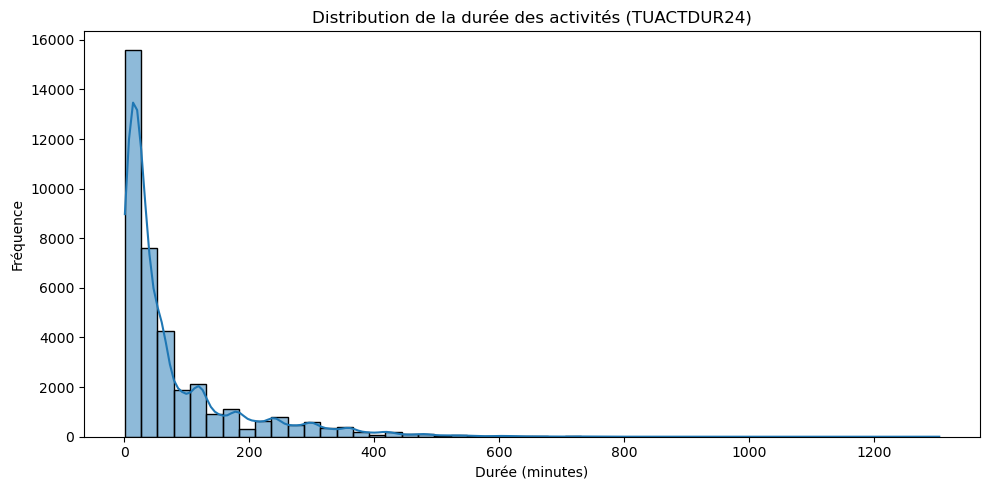

In [18]:
# 10. Visualisations
plt.figure(figsize=(10, 5))
sns.histplot(df['TUACTDUR24'], bins=50, kde=True)
plt.title("Distribution de la durée des activités (TUACTDUR24)")
plt.xlabel("Durée (minutes)")
plt.ylabel("Fréquence")
plt.tight_layout()
plt.show()

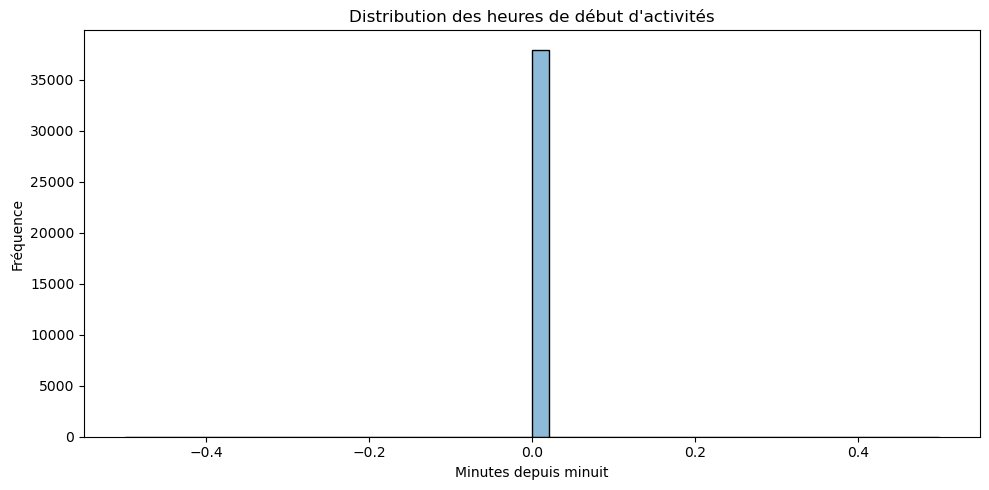

In [19]:
plt.figure(figsize=(10, 5))
sns.histplot(df['START_TIME_MINUTES'], bins=48, kde=True)
plt.title("Distribution des heures de début d'activités")
plt.xlabel("Minutes depuis minuit")
plt.ylabel("Fréquence")
plt.tight_layout()
plt.show()

C:\Windows\Temp\ipykernel_22648\1944416552.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_activities.values, y=top_activities.index, palette="viridis")


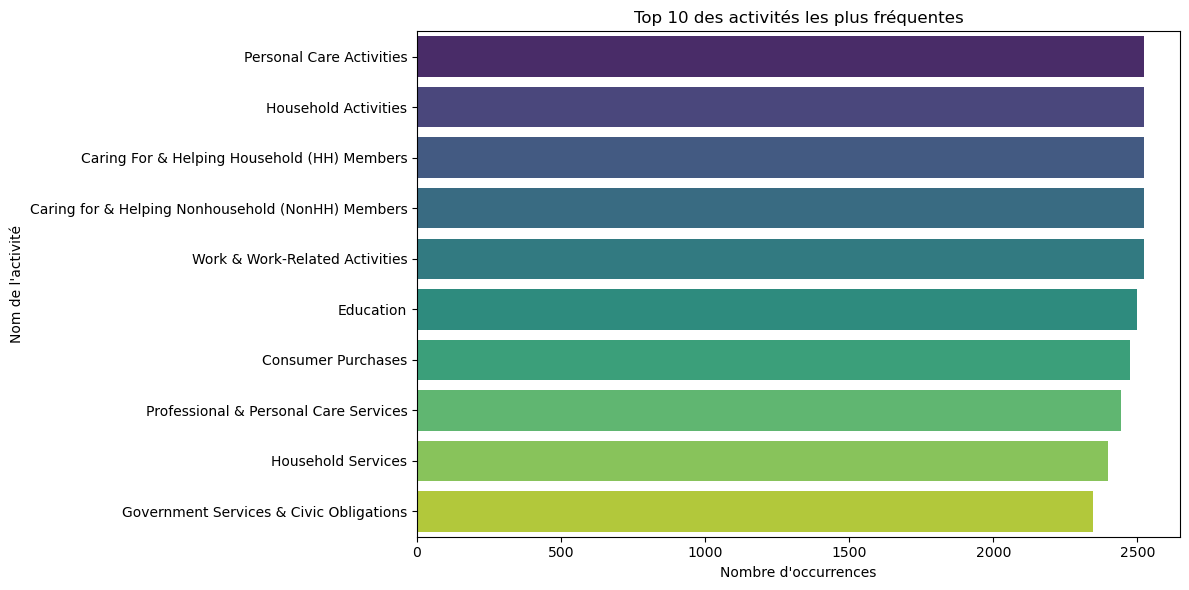

In [20]:
plt.figure(figsize=(12, 6))
top_activities = df['ACTIVITY_NAME'].value_counts().head(10)
sns.barplot(x=top_activities.values, y=top_activities.index, palette="viridis")
plt.title("Top 10 des activités les plus fréquentes")
plt.xlabel("Nombre d'occurrences")
plt.ylabel("Nom de l'activité")
plt.tight_layout()
plt.show()

In [21]:
df.columns

Index(['TUCASEID', 'TUACTIVITY_N', 'TUACTDUR24', 'TUSTARTTIM', 'TEWHERE',
       'ACTIVITY_NAME', 'TUDIARYDAY', 'TUFNWGTP001', 'TUFNWGTP002', 'GEMETSTA',
       'GTMETSTA', 'ACTIVITY_NAME_ENC', 'TEWHERE_ENC', 'START_TIME_MINUTES',
       'DAY_OF_WEEK', 'IS_WEEKEND', 'hour'],
      dtype='object')